#Import Necessary Libraries

In [32]:
import numpy as np                      # numpy used for mathematical operation on array
import pandas as pd                     # pandas used for data manipulation on dataframe
import matplotlib.pyplot as plt         # matplotlib used for data visualization
import seaborn as sns                   # seaborn used for data visualization
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action='ignore')

#Reading Dataset

In [33]:
# Reading Both the datasets with pandas

df1 = pd.read_csv("/content/students(1).csv")
df2 = pd.read_csv("/content/students(2).csv")

In [34]:
# Reading first 5 Rows of the dataset 1

df1.head()

,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup
0,1,GP,1,18,U,NaN,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no
1,2,GP,1,17,U,NaN,T,1,1,at_home,other,NaN,father,1,2,0,no,yes
2,3,GP,1,15,U,NaN,T,1,1,at_home,other,other,mother,1,2,3,yes,no
3,4,GP,1,15,U,GT3,T,4,2,health,services,NaN,mother,1,3,0,no,yes
4,5,GP,1,16,U,GT3,T,3,3,other,other,NaN,father,1,2,0,no,yes


In [35]:
# Checking the shape of the dataset 1

df1.shape

(395, 18)

In [36]:
# Reading first 5 Rows of the dataset 2

df2.head()

,id,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,no,no,yes,NaN,no,no,4,3,4,1,1,?,6,5,6,6
1,2,no,no,no,NaN,yes,no,5,3,3,1,1,?,4,5,5,6
2,3,yes,no,yes,NaN,yes,no,4,3,2,2,3,?,10,7,8,10
3,4,yes,yes,yes,yes,yes,yes,3,2,2,1,1,?,2,15,14,15
4,5,yes,no,yes,yes,no,no,4,3,2,1,2,?,4,6,10,10


In [37]:
# Checking the shape of the dataset 2

df2.shape

(395, 17)

In [38]:
# Merging both the dataset 

df = pd.merge(df1, df2, on=['id'])

In [39]:
# Reading first 5 Rows of the data

df.head()

,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,1,18,U,NaN,A,4,4,at_home,...,4,3,4,1,1,?,6,5,6,6
1,2,GP,1,17,U,NaN,T,1,1,at_home,...,5,3,3,1,1,?,4,5,5,6
2,3,GP,1,15,U,NaN,T,1,1,at_home,...,4,3,2,2,3,?,10,7,8,10
3,4,GP,1,15,U,GT3,T,4,2,health,...,3,2,2,1,1,?,2,15,14,15
4,5,GP,1,16,U,GT3,T,3,3,other,...,4,3,2,1,2,?,4,6,10,10


In [40]:
# Reading last 5 Rows of the data

df.tail()

,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,391,MS,M,20,U,LE3,A,2,2,services,...,5,5,4,4,5,?,11,9,9,9
391,392,MS,M,17,U,NaN,T,3,1,services,...,2,4,5,3,4,?,3,14,16,16
392,393,MS,M,21,R,NaN,T,1,1,other,...,5,5,3,3,3,?,3,10,8,7
393,394,MS,M,18,R,NaN,T,3,2,services,...,4,4,1,3,4,?,0,11,12,10
394,395,MS,M,19,U,NaN,T,1,1,other,...,3,2,3,3,3,?,5,8,9,9


In [41]:
# Checking the shape of the data

df.shape

(395, 34)

In [42]:
# Checking the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          395 non-null    int64 
 1   school      395 non-null    object
 2   sex         395 non-null    object
 3   age         395 non-null    int64 
 4   address     395 non-null    object
 5   famsize     157 non-null    object
 6   Pstatus     395 non-null    object
 7   Medu        395 non-null    int64 
 8   Fedu        395 non-null    int64 
 9   Mjob        395 non-null    object
 10  Fjob        395 non-null    object
 11  reason      66 non-null     object
 12  guardian    395 non-null    object
 13  traveltime  395 non-null    int64 
 14  studytime   395 non-null    int64 
 15  failures    395 non-null    int64 
 16  schoolsup   395 non-null    object
 17  famsup      395 non-null    object
 18  paid        395 non-null    object
 19  activities  395 non-null    object
 20  nursery   

In [43]:
# Checking the summary statistics of the dataset

df.describe(include='all')

,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395,395,395.000000,395,157,395,395.000000,395.000000,395,...,395.000000,395.000000,395.000000,395.000000,395.000000,395,395.000000,395.000000,395.000000,395.000000
unique,NaN,2,2,NaN,2,2,2,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN
top,NaN,GP,1,NaN,U,GT3,T,NaN,NaN,other,...,NaN,NaN,NaN,NaN,NaN,?,NaN,NaN,NaN,NaN
freq,NaN,349,208,NaN,307,117,354,NaN,NaN,141,...,NaN,NaN,NaN,NaN,NaN,383,NaN,NaN,NaN,NaN
mean,198.000000,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,...,3.944304,3.235443,3.108861,1.481013,2.291139,NaN,5.708861,10.908861,10.713924,10.415190
std,114.170924,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,...,0.896659,0.998862,1.113278,0.890741,1.287897,NaN,8.003096,3.319195,3.761505,4.581443
min,1.000000,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,3.000000,0.000000,0.000000
25%,99.500000,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,NaN,0.000000,8.000000,9.000000,8.000000
50%,198.000000,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,NaN,4.000000,11.000000,11.000000,11.000000
75%,296.500000,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,NaN,8.000000,13.000000,13.000000,14.000000


In [44]:
# Checking the null values of the data

df.isnull()

,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
391,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
392,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
393,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
# We can see the data types of each column in a tabular format.

Data_dict = pd.DataFrame(df.dtypes)
Data_dict

,0
id,int64
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object


In [46]:
# identifying the missing values of each column in a tabular format.

Data_dict['MissingVal'] = df.isnull().sum()
Data_dict

,0,MissingVal
id,int64,0
school,object,0
sex,object,0
age,int64,0
address,object,0
famsize,object,238
Pstatus,object,0
Medu,int64,0
Fedu,int64,0
Mjob,object,0


In [47]:
# identifying the unique values of each column in a tabular format.

Data_dict['UniqueVal'] = df.nunique()
Data_dict

,0,MissingVal,UniqueVal
id,int64,0,395
school,object,0,2
sex,object,0,2
age,int64,0,8
address,object,0,2
famsize,object,238,2
Pstatus,object,0,2
Medu,int64,0,5
Fedu,int64,0,5
Mjob,object,0,5


In [48]:
# identifying count of the variable.

Data_dict['Count'] = df.count()
Data_dict

,0,MissingVal,UniqueVal,Count
id,int64,0,395,395
school,object,0,2,395
sex,object,0,2,395
age,int64,0,8,395
address,object,0,2,395
famsize,object,238,2,157
Pstatus,object,0,2,395
Medu,int64,0,5,395
Fedu,int64,0,5,395
Mjob,object,0,5,395


In [49]:
# Checking the sum of null values of the data

df.isnull().sum()

id              0
school          0
sex             0
age             0
address         0
famsize       238
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason        329
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher        322
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences        0
G1              0
G2              0
G3              0
dtype: int64

In [50]:
# Impute "categorical null values" with Mode value

df['famsize'].fillna(df['famsize'].mode()[0], inplace=True)
df['higher'].fillna(df['higher'].mode()[0], inplace=True)
df['reason'].fillna(df['reason'].mode()[0], inplace=True)

In [51]:
# Checking the sum of null values of the updated data

df.isnull().sum()

id            0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

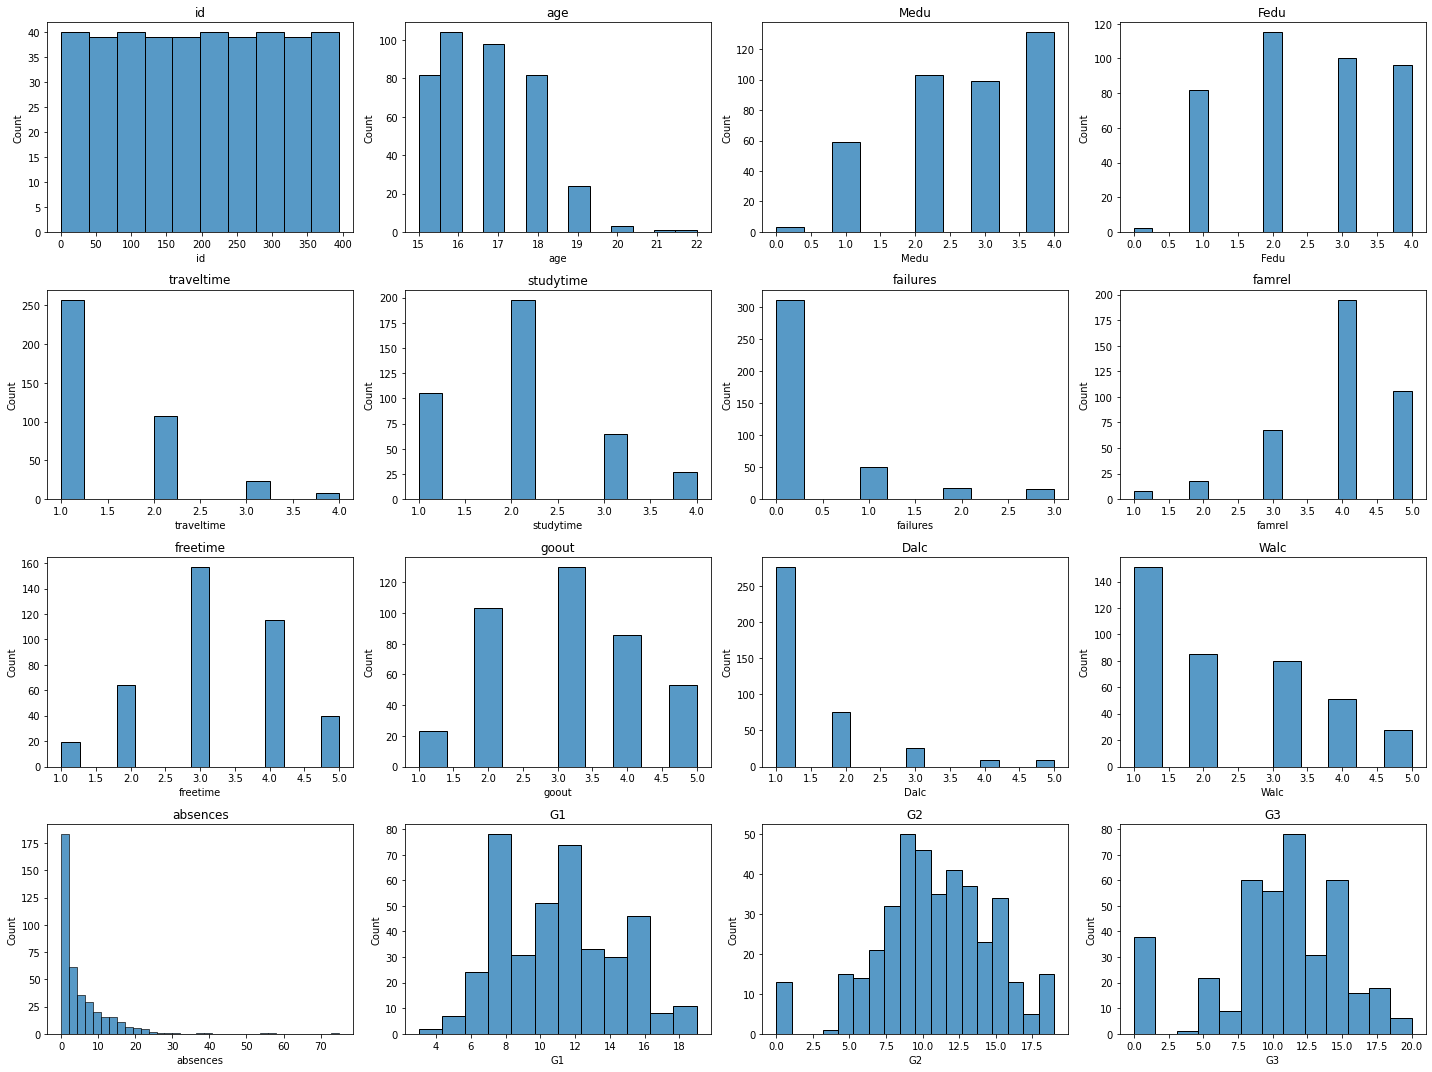

In [52]:
"""
The code generates a grid of subplots where each subplot shows the distribution,
(i.e., histogram) of a variable/column in the df DataFrame.
This type of plot can be useful for exploring the shape and spread of each variable in a dataset.
"""

# Select only the numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Create subplots of histograms for each numerical column
n_rows = 4  # Number of rows in the subplot grid
n_cols = 4  # Number of columns in the subplot grid
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
for i, col in enumerate(num_cols):
    r = i // n_cols
    c = i % n_cols
    ax = axes[r][c]
    sns.histplot(df[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

<AxesSubplot:>

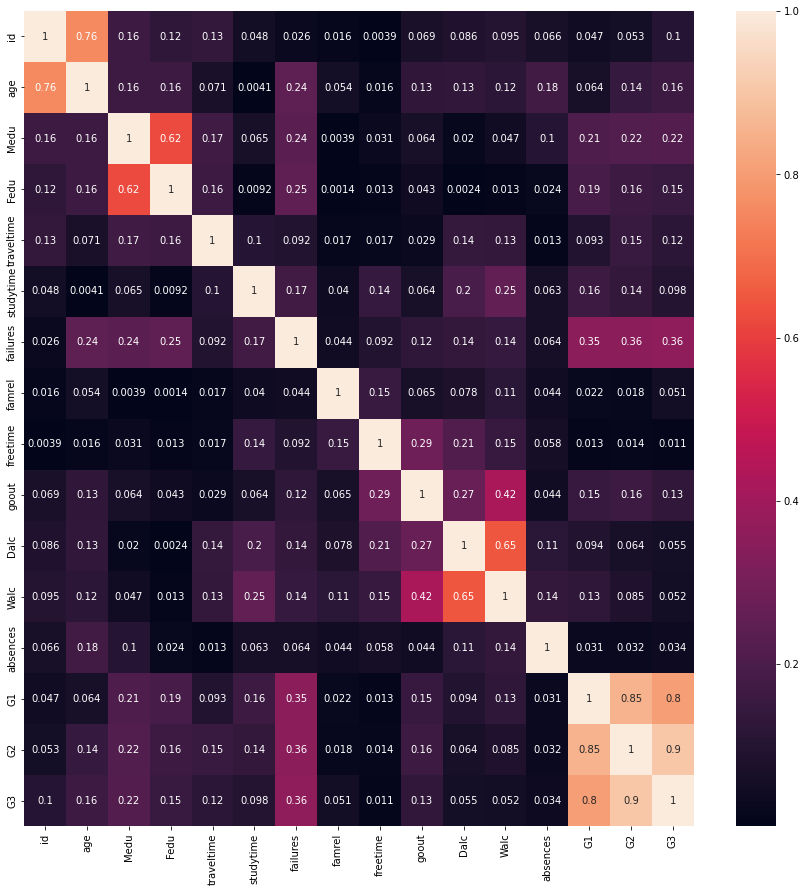

In [53]:
"""
Heatmap function to visualize the correlation matrix of the columns.
It hows the pairwise correlations (i.e., linear relationships) between all pairs of variables/columns in the DataFrame.
"""

plt.figure(figsize=(15, 15))
sns.heatmap(df.corr().abs(),annot=True)

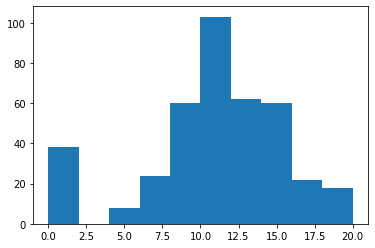

In [54]:
"""
This graps provide a basic summary and visualization of the distribution of the basesalary column.
The x-axis of the histogram will represent the range of basesalary values, divided into several bins, 
and the y-axis will represent the frequency of observations falling into each bin. 
"""

df.describe()
plt.hist(df['G3'])
plt.show()

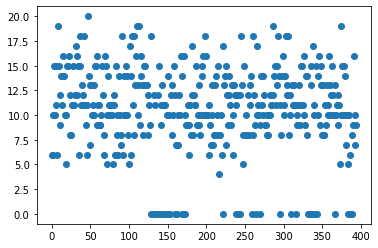

In [55]:
# Scatterplot, with df.index as the values for the x-axis and df['area'] as the values for the y-axis.

plt.scatter(df.index, df['G3'])
plt.show()

In [56]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Select categorical variables (assuming they are in object data type)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Label encode categorical variables
le = LabelEncoder()
for col in cat_vars:
    df[col] = le.fit_transform(df[col])

In [57]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc)) 

Column id outliers = 0.00%
Column school outliers = 100.00%
Column sex outliers = 0.00%
Column age outliers = 0.51%
Column address outliers = 100.00%
Column famsize outliers = 100.00%
Column Pstatus outliers = 100.00%
Column Medu outliers = 0.00%
Column Fedu outliers = 0.51%
Column Mjob outliers = 14.94%
Column Fjob outliers = 5.06%
Column reason outliers = 100.00%
Column guardian outliers = 100.00%
Column traveltime outliers = 2.03%
Column studytime outliers = 6.84%
Column failures outliers = 100.00%
Column schoolsup outliers = 100.00%
Column famsup outliers = 0.00%
Column paid outliers = 0.00%
Column activities outliers = 0.00%
Column nursery outliers = 100.00%
Column higher outliers = 100.00%
Column internet outliers = 100.00%
Column romantic outliers = 0.00%
Column famrel outliers = 6.58%
Column freetime outliers = 4.81%
Column goout outliers = 0.00%
Column Dalc outliers = 4.56%
Column Walc outliers = 0.00%
Column health outliers = 100.00%
Column absences outliers = 4.81%
Column G1

In [58]:
# Select numerical variables with outliers (assuming they are in float data type)

num_vars = df.select_dtypes(include=['float','int']).columns.tolist()



# Replace outliers with the maximum and minimum values of each variable

for col in num_vars:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    df[col] = df[col].apply(lambda x: upper_limit if x > upper_limit else x)
    df[col] = df[col].apply(lambda x: lower_limit if x < lower_limit else x)

In [59]:
import pandas as pd
import numpy as np

# Define function to treat outliers in a column
def treat_outliers(col):
    mean = np.mean(col)
    std = np.std(col)
    threshold = 3
    outlier_indices = col[np.abs(col - mean) > std * threshold].index
    col[outlier_indices] = mean

# Treat outliers in each column of the dataset
for col in df.columns:
    treat_outliers(df[col])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          395 non-null    int64  
 1   school      395 non-null    float64
 2   sex         395 non-null    float64
 3   age         395 non-null    float64
 4   address     395 non-null    float64
 5   famsize     395 non-null    float64
 6   Pstatus     395 non-null    float64
 7   Medu        395 non-null    float64
 8   Fedu        395 non-null    float64
 9   Mjob        395 non-null    float64
 10  Fjob        395 non-null    float64
 11  reason      395 non-null    float64
 12  guardian    395 non-null    float64
 13  traveltime  395 non-null    float64
 14  studytime   395 non-null    float64
 15  failures    395 non-null    float64
 16  schoolsup   395 non-null    float64
 17  famsup      395 non-null    float64
 18  paid        395 non-null    float64
 19  activities  395 non-null    f

In [62]:
# Split the data into features and target

features = df.drop(['G3'], axis=1).values
target = df['G3'].values.reshape(-1, 1)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33,  random_state = 2)

###Comparing the error with SKLearn Lasso Regression

In [64]:
from sklearn.linear_model import Lasso
sk_model = Lasso()

In [65]:
sk_model.fit(X_train, y_train)

Lasso()

In [66]:
sk_train_data_prediction = sk_model.predict(X_train)

In [67]:
test_data_prediction = sk_model.predict(X_test)

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# R squared error
score_1_ = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2_ = metrics.mean_absolute_error(y_test, test_data_prediction)


print("R squared error : ", score_1_)
print('Mean Absolute Error : ', score_2_)

R squared error :  0.8538934651691995
Mean Absolute Error :  1.0967118408796481


#LASSO REGRESSION

In [69]:
# creating a class for Lasso Regression

class Lasso_Regression():

    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter
    
    def set_params(self, **kwargs):
        for key, value in kwargs.items():
            setattr(self, key, value)
        return self

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y

        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        Y_prediction = self.predict(self.X)

        dw = np.zeros(self.n)
        for i in range(self.n):
            if self.w[i] > 0:
                dw[i] = (-(2 * (self.X[:, i]).dot(self.y - Y_prediction)) + self.lambda_parameter) / self.m
            else:
                dw[i] = (-(2 * (self.X[:, i]).dot(self.y - Y_prediction)) - self.lambda_parameter) / self.m

        db = - 2 * np.sum(self.y - Y_prediction) / self.m

        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
    
    def predict(self, X):
        return X.dot(self.w) + self.b
    
    def score(self, X, y):
        Y_prediction = self.predict(X)
        return 1 - ((y - Y_prediction) ** 2).sum() / ((y - y.mean()) ** 2).sum()


    


  # Predicting the Target variable
    def predict(self,X):
      return np.dot(X, self.w.reshape(-1,1)) + self.b
  
    def mean_squared_error(self,y_true, y_pred):
   
      # Check if the lengths of both arrays are equal
        if len(y_true) != len(y_pred):
            raise ValueError("Length of y_true and y_pred should be the same.")
      
      # Calculate the squared differences between the true and predicted values
        squared_differences = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
      
      # Calculate the mean of the squared differences
        mse1 = sum(squared_differences) / len(squared_differences)
      
        return mse1
    def r2(self,y_true, y_pred):
    # Calculate the mean of the true values
      y_true_mean = sum(y_true) / len(y_true)
    
    # Calculate the total sum of squares (TSS)
      tss = sum((y_true - y_true_mean) ** 2)
    
    # Calculate the residual sum of squares (RSS)
      rss = sum((y_true - y_pred) ** 2)
    
    # Calculate the R-squared value
      r2_score = 1 - (rss / tss)
    
      return r2_score

In [70]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
model = Lasso_Regression(learning_rate= 0.1, no_of_iterations= 200, lambda_parameter= 0.01)

In [72]:
model.fit(X_train, y_train)

In [73]:
test_data_prediction = model.predict(X_test)

In [74]:
from sklearn import metrics

# R squared error
score_1 = model.r2(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = model.mean_squared_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Squared Error : ', score_2)

R squared error :  [0.86764206]
Mean Squared Error :  [2.35634305]
